In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('Excel/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [66]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [67]:
y = df['Purchased']
X = df.drop(axis=1, columns='Purchased')

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [69]:
X.describe()

,User ID,Age,EstimatedSalary
count,4.000000e+02,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000
std,7.165832e+04,10.482877,34096.960282
min,1.556669e+07,18.000000,15000.000000
25%,1.562676e+07,29.750000,43000.000000
50%,1.569434e+07,37.000000,70000.000000
75%,1.575036e+07,46.000000,88000.000000
max,1.581524e+07,60.000000,150000.000000


In [71]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
columns = [col for col in X.columns]
X[columns] = oe.fit_transform(X[columns])
#X = pd.get_dummies(X, columns=['Gender'], drop_first=True)
#X.head()

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
model = DecisionTreeRegressor()

In [74]:
model.fit(X, y)

DecisionTreeRegressor()

In [75]:
importance = model.feature_importances_
importance

array([0.15064298, 0.00226751, 0.46828047, 0.37880904])

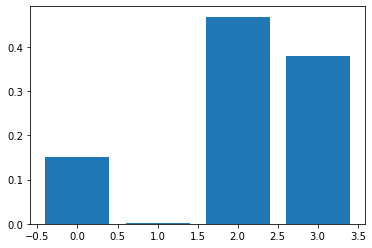

In [76]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125)
#X_train.drop(columns='User ID', axis=1, inplace=True)
#X_test.drop(columns='User ID', axis=1, inplace=True)

In [79]:
X_train.head()

,User ID,Gender,Age,EstimatedSalary
166,314.0,0.0,4.0,38.0
366,8.0,0.0,40.0,30.0
263,321.0,0.0,17.0,53.0
111,136.0,0.0,19.0,52.0
132,257.0,1.0,12.0,68.0


In [80]:
features = [col for col in X_train.columns]
features

['User ID', 'Gender', 'Age', 'EstimatedSalary']

In [81]:
sc = StandardScaler()
X_train[features] = sc.fit_transform(X_train[features])
X_test[features] = sc.transform(X_test[features])

In [82]:
X_train

,User ID,Gender,Age,EstimatedSalary
166,0.987477,-0.949828,-1.515117,-0.409597
366,-1.665845,-0.949828,1.970454,-0.680405
263,1.048174,-0.949828,-0.256438,0.098168
111,-0.555959,-0.949828,-0.062796,0.064317
132,0.493231,1.052822,-0.740546,0.605933
...,...,...,...,...
119,0.129049,1.052822,0.324490,-0.308044
29,-0.382539,1.052822,-0.643724,-1.594382
277,1.022161,1.052822,1.099061,0.639784
142,-1.006850,1.052822,-0.256438,-0.308044


In [83]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [84]:
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
y_pred1 = model.predict(X_train)
print(accuracy_score(y_train, y_pred1))

1.0


In [85]:
# I tried many preprocessing and this was the best result
y_pred2 = model.predict(X_test)
print(accuracy_score(y_test, y_pred2))

0.98
